In [2]:
#new "plots"
import argparse
import pysam
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
import scipy.stats as stats

In [3]:
#add the CHANGE seq beds
alt7_taylor = 'alt7_taylor.bed'
rex4_taylor = 'rex4_taylor.bed'
rexc_taylor = 'rexc_taylor.bed'
altc_taylor = 'altc_taylor.bed'

#the cas offinder beds
alt7_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_alt7_4mismatches.bed'
rex4_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_rex4_4mismatches.bed'
rexc_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_rexc_4mismatches.bed'
altc_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_altc_4mismatches.bed'

#the region after lifting (post lift)

#get the original genomic coordinates and add it to the csvs... somehow

print('ALTC_0casoffinder_taylor_consensus_comparison_hg38.csv')

#contains the locations of all the guides (lifted)
altc = Path('small_bams_again') / 'beds' / 'altc_lifted.bed'
alt7 = Path('small_bams_again') / 'beds' / 'alt7_lifted.bed'
rex4 = Path('small_bams_again') / 'beds' / 'rex4_lifted.bed'
rexc = Path('small_bams_again') / 'beds' / 'rexc_lifted.bed'

altc = 'altc_taylor.bed'
alt7 = 'alt7_taylor.bed'
rex4 = 'rex4_taylor.bed'
rexc = 'rexc_taylor.bed'

all_tsvs = {'ALTC':pd.read_csv(altc, sep='\t',  names=['chrom','start','end','na','na2','REGION']),  
    'ALT7':pd.read_csv(alt7, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REX4':pd.read_csv(rex4, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REXC':pd.read_csv(rexc, sep='\t',  names=['chrom','start','end','na','na2','REGION'])}


all_tsvs_cof = {'ALTC':pd.read_csv(altc_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),  
    'ALT7':pd.read_csv(alt7_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REX4':pd.read_csv(rex4_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REXC':pd.read_csv(rexc_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION'])}



edited_dfs = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}


edited_dfs_cof = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs_cof = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs_cof = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}


#these are the cassofinder csvs
for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}casoffinder_taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs_cof[condition][replicate] = pd.read_csv(file_path)
        edited_dfs_cof[condition][replicate]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
        edited_dfs_cof[condition][replicate]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
        edited_dfs_cof[condition][replicate]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()
        
for condition in all_tsvs:
    file_path = f"{condition}casoffinder_taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs_cof[condition] = pd.read_csv(file_path)
    control_dfs_cof[condition]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
    control_dfs_cof[condition]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
    control_dfs_cof[condition]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()

for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"{condition}{replicate}casoffinder_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        comp_dfs_cof[condition][replicate] = pd.read_csv(file_path)
        comp_dfs_cof[condition][replicate]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
        comp_dfs_cof[condition][replicate]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
        comp_dfs_cof[condition][replicate]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()

#these are the normal ones
for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs[condition][replicate] = pd.read_csv(file_path)
        edited_dfs[condition][replicate]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
        edited_dfs[condition][replicate]['start_orig'] = all_tsvs[condition]['start'].to_list()
        edited_dfs[condition][replicate]['end_orig'] = all_tsvs[condition]['end'].to_list()

for condition in all_tsvs:
    file_path = f"{condition}taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs[condition] = pd.read_csv(file_path)
    control_dfs[condition]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
    control_dfs[condition]['start_orig'] = all_tsvs[condition]['start'].to_list()
    control_dfs[condition]['end_orig'] = all_tsvs[condition]['end'].to_list()

for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"{condition}{replicate}_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        print(file_path)
        comp_dfs[condition][replicate] = pd.read_csv(file_path)
        comp_dfs[condition][replicate]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
        comp_dfs[condition][replicate]['start_orig'] = all_tsvs[condition]['start'].to_list()
        comp_dfs[condition][replicate]['end_orig'] = all_tsvs[condition]['end'].to_list()


print(comp_dfs.keys())
print(comp_dfs_cof.keys())

ALTC_0casoffinder_taylor_consensus_comparison_hg38.csv
ALTC0_taylor_consensus_comparison_hg38.csv
ALTC1_taylor_consensus_comparison_hg38.csv
ALT70_taylor_consensus_comparison_hg38.csv
ALT71_taylor_consensus_comparison_hg38.csv
REX40_taylor_consensus_comparison_hg38.csv
REX41_taylor_consensus_comparison_hg38.csv
REXC0_taylor_consensus_comparison_hg38.csv
REXC1_taylor_consensus_comparison_hg38.csv
dict_keys(['ALTC', 'ALT7', 'REXC', 'REX4'])
dict_keys(['ALTC', 'ALT7', 'REXC', 'REX4'])


In [5]:
comp_dfs['ALTC'][0]

#combine the graphs
for condition in all_tsvs.keys():
    print(comp_dfs[condition][0].columns)
    comp_dfs_cof[condition][0]['total wt reads rep 2'] = comp_dfs_cof[condition][1]['total wt reads'] 
    comp_dfs_cof[condition][0]['total edited reads rep 2'] = comp_dfs_cof[condition][1]['total edited reads'] 
    comp_dfs_cof[condition][0]['edited reads with indels rep 2'] = comp_dfs_cof[condition][1]['edited reads with indels '] 
    comp_dfs_cof[condition][0]['wt reads with indels rep 2'] = comp_dfs_cof[condition][1]['wt reads with indels'] 
    comp_dfs_cof[condition][0]['edited indel % rep2'] = comp_dfs_cof[condition][1]['edited indel %'] 
    comp_dfs_cof[condition][0]['wt indel % rep2'] = comp_dfs_cof[condition][1]['wt indel %'] 

    comp_dfs_cof[condition][0]['combined_edited_reads'] = comp_dfs_cof[condition][0]['total edited reads'] + comp_dfs_cof[condition][1]['total edited reads']
    comp_dfs_cof[condition][0]['combined_wt_reads'] = comp_dfs_cof[condition][0]['total wt reads'] + comp_dfs_cof[condition][1]['total wt reads']
    comp_dfs_cof[condition][0]['combined_edited_reads_w_indels'] = comp_dfs_cof[condition][0]['edited reads with indels '] + comp_dfs_cof[condition][1]['edited reads with indels ']
    comp_dfs_cof[condition][0]['combined_wt_reads_w_indels'] = comp_dfs_cof[condition][0]['wt reads with indels'] + comp_dfs_cof[condition][1]['wt reads with indels']
    comp_dfs_cof[condition][0]['combined edited indel %'] = comp_dfs_cof[condition][0]['combined_edited_reads_w_indels'] / comp_dfs_cof[condition][0]['combined_edited_reads']
    comp_dfs_cof[condition][0]['combined wt indel %'] = comp_dfs_cof[condition][0]['combined_wt_reads_w_indels'] / comp_dfs_cof[condition][0]['combined_wt_reads']
    
    for index, row in comp_dfs_cof[condition][0].iterrows():
        region = row['REGION']
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
                      int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]
        
        cont['edited'] = [int(row['combined_edited_reads_w_indels']),
                      int(row['combined_edited_reads']) - int(row['combined_edited_reads_w_indels'])]

        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)
        comp_dfs_cof[condition][0].loc[comp_dfs_cof[condition][0]['REGION'] == region, 'combined indel p-value'] = p_value


#recreating the p-value calculation now that we include all locations and stuff
for condition in all_tsvs.keys():
    print(comp_dfs[condition][0].columns)
    comp_dfs[condition][0]['total wt reads rep 2'] = comp_dfs[condition][1]['total wt reads'] 
    comp_dfs[condition][0]['total edited reads rep 2'] = comp_dfs[condition][1]['total edited reads'] 
    comp_dfs[condition][0]['edited reads with indels rep 2'] = comp_dfs[condition][1]['edited reads with indels '] 
    comp_dfs[condition][0]['wt reads with indels rep 2'] = comp_dfs[condition][1]['wt reads with indels'] 
    comp_dfs[condition][0]['edited indel % rep2'] = comp_dfs[condition][1]['edited indel %'] 


    comp_dfs[condition][0]['combined_edited_reads'] = comp_dfs[condition][0]['total edited reads'] + comp_dfs[condition][1]['total edited reads']
    comp_dfs[condition][0]['combined_wt_reads'] = comp_dfs[condition][0]['total wt reads'] + comp_dfs[condition][1]['total wt reads']
    comp_dfs[condition][0]['combined_edited_reads_w_indels'] = comp_dfs[condition][0]['edited reads with indels '] + comp_dfs[condition][1]['edited reads with indels ']
    comp_dfs[condition][0]['combined_wt_reads_w_indels'] = comp_dfs[condition][0]['wt reads with indels'] + comp_dfs[condition][1]['wt reads with indels']
    comp_dfs[condition][0]['combined edited indel %'] = comp_dfs[condition][0]['combined_edited_reads_w_indels'] / comp_dfs[condition][0]['combined_edited_reads']
    comp_dfs[condition][0]['combined wt indel %'] = comp_dfs[condition][0]['combined_wt_reads_w_indels'] / comp_dfs[condition][0]['combined_wt_reads']

    #calculates the p-value for each of the rows
    for index, row in comp_dfs[condition][0].iterrows():
        region = row['REGION']
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
                      int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]
        
        cont['edited'] = [int(row['combined_edited_reads_w_indels']),
                      int(row['combined_edited_reads']) - int(row['combined_edited_reads_w_indels'])]

        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)
        comp_dfs[condition][0].loc[comp_dfs[condition][0]['REGION'] == region, 'combined indel p-value'] = p_value

display(comp_dfs[condition][0])

Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt 

,Unnamed: 0,REGION,chrom,start,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,edited reads with indels rep 2,wt reads with indels rep 2,edited indel % rep2,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value
0,0,REGION_0.bam,chr1,28594989.0,28595011.0,0.003407,0.005025,587.0,597.0,2,...,1,3,0.001736,1163.0,1194.0,3,6,0.002580,0.005025,0.507317
1,1,REGION_1.bam,chr15,94909979.0,94910002.0,0.000000,0.000000,453.0,467.0,0,...,0,0,0.000000,900.0,934.0,0,0,0.000000,0.000000,1.000000
2,2,REGION_2.bam,chr16,5625250.0,5625273.0,0.000000,0.000000,472.0,549.0,0,...,0,0,0.000000,1000.0,1098.0,0,0,0.000000,0.000000,1.000000
3,3,REGION_3.bam,chr5,135883747.0,135883770.0,0.000000,0.000000,507.0,564.0,0,...,0,0,0.000000,1012.0,1128.0,0,0,0.000000,0.000000,1.000000
4,4,REGION_4.bam,chr19,32985142.0,32985165.0,0.002110,0.001748,474.0,572.0,1,...,0,1,0.000000,974.0,1144.0,1,2,0.001027,0.001748,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,REGION_2575.bam,chr6,1610013.0,1610036.0,0.255521,0.233236,317.0,343.0,81,...,80,80,0.245399,643.0,686.0,161,160,0.250389,0.233236,0.480956
2576,2576,REGION_2576.bam,chr1,36486968.0,36486991.0,0.000000,0.001631,564.0,613.0,0,...,0,1,0.000000,1074.0,1226.0,0,2,0.000000,0.001631,0.501967
2577,2577,REGION_2577.bam,chrX,80805788.0,80805810.0,0.000000,0.000000,344.0,430.0,0,...,0,0,0.000000,817.0,860.0,0,0,0.000000,0.000000,1.000000
2578,2578,REGION_2578.bam,chr1,1185685.0,1185708.0,0.003367,0.006088,594.0,657.0,2,...,1,4,0.001751,1165.0,1314.0,3,8,0.002575,0.006088,0.234827


In [6]:
#add a row for the new table
def construct_comp_tbl(wt, edited):
    comp_df = pd.DataFrame([])

    # Ensure 'REGION' column is included
    comp_df['REGION'] = wt['REGION'].tolist()
    
    #construct a contigency table
    for index, row in wt.iterrows():
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        
        region = row['REGION']
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
        int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]

        row2 = edited.iloc[index]
        cont['edited'] = [int(row2['combined_edited_reads_w_indels']),
        int(row2['combined_edited_reads']) - int(row2['combined_edited_reads_w_indels'])]
        
        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)

        comp_df.loc[comp_df['REGION'] == region, 'chrom'] = row['chrom']
        comp_df.loc[comp_df['REGION'] == region, 'start'] = row2['start']
        comp_df.loc[comp_df['REGION'] == region, 'end'] = row['end']
        comp_df.loc[comp_df['REGION'] == region, 'combined indel p-value'] = p_value
        
    return comp_df

In [8]:
for condition in comp_dfs:
    for replicate in np.arange(0,1):
        print(comp_dfs[condition][replicate]['chrom'].unique())

for condition in comp_dfs_cof:
    for replicate in np.arange(0,1):
        print(comp_dfs_cof[condition][replicate]['chrom'].unique())

['chr3' 'chr4' 'chrX' 'chr1' 'chr7' 'chr12' 'chr17' 'chr13' 'chr15' 'chr5'
 'chr8' 'chr9' 'chr20' 'chr16' 'chr10' 'chr2' 'chr14' 'chr21' 'chr18'
 'chr11' 'chr6' 'chr19' 'chr22']
['chr8' 'chr1' 'chr7' 'chr6' 'chr18' 'chr14' 'chr16' 'chr9' 'chr5' 'chr10'
 'chr11' 'chr2' 'chr12' 'chr3' 'chr17' 'chrX' 'chr15' 'chr4' 'chr22'
 'chr20' 'chr13' 'chr21' 'chr19']
['chr1' 'chr15' 'chr16' 'chr5' 'chr19' 'chr3' 'chr14' 'chr22' 'chr9'
 'chr10' 'chr18' 'chr4' 'chr8' 'chr11' 'chr2' 'chr21' 'chr6' 'chrX'
 'chr20' 'chr12' 'chr17' 'chr7' 'chr13']
['chr11' 'chr21' 'chr5' 'chr20' 'chr1' 'chr8' 'chr7' 'chr6' 'chr9' 'chr16'
 'chr18' 'chr19' 'chr4' 'chr3' 'chrX' 'chr17' 'chr15' 'chr10' 'chr2'
 'chr12' 'chr22' 'chr14' 'chr13']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12' 'chr4'
 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6' 'chrY' 'chr11' 'chr10'
 'chr13' 'chr3']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12'
 'chr21' 'chr4' 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6

In [9]:
comp_dfs['REX4'][0][comp_dfs['REX4'][0]['combined indel p-value'] == min(comp_dfs['REX4'][0]['combined indel p-value'])]

,Unnamed: 0,REGION,chrom,start,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,edited reads with indels rep 2,wt reads with indels rep 2,edited indel % rep2,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value
10,10,REGION_10.bam,chr9,27573639.0,27573662.0,0.633523,0.0,352.0,479.0,223,...,222,0,0.526066,774.0,958.0,445,0,0.574935,0.0,5.151496e-200


In [10]:
from statsmodels.stats.multitest import multipletests

#combine the two tables
for condition in all_tsvs:
    for replicate in range(1):  # Iterate through two replicates (0 and 1)
        comp_dfs_cof[condition][replicate]['category'] = 'Cas-OFFinder'
        comp_dfs[condition][replicate]['category'] = 'CHANGE-seq'
        comp_dfs[condition][replicate]=pd.concat([comp_dfs_cof[condition][replicate],comp_dfs[condition][replicate]])


for condition in all_tsvs:
    for replicate in range(0,1):  # Iterate through two replicates (0 and 1)
        # Get the raw p-values for the current replicate and condition
        raw_p_values = comp_dfs[condition][replicate]['indel p-value']
        combined_raw_p_values = comp_dfs[condition][replicate]['combined indel p-value']
        
        # Apply Benjamini-Hochberg correction (FDR control)
        reject, adjusted_p_values, _, _ = multipletests(combined_raw_p_values, alpha=0.05, method='fdr_bh')
        combined_reject, combined_adjusted_p_values, combined_, combined_ = multipletests(combined_raw_p_values, alpha=0.05, method='fdr_bh')

        
        # Add the adjusted p-values back into the DataFrame
        comp_dfs[condition][replicate]['adjusted indel p-value'] = adjusted_p_values
        comp_dfs[condition][replicate]['combined adjusted indel p-value'] = combined_adjusted_p_values
        

        # Optionally, you could also keep the "reject" array to know which tests are significant
        # comp_dfs[condition][replicate]['reject null'] = reject

for condition in ['ALT7', 'ALTC', 'REXC', 'REX4']:
    for replicate in [0, 1]:
        df = comp_dfs[condition][replicate]

        agg_dict = {}
        for col in df.columns:
            if col == 'start':
                continue  # grouping column
            elif col == 'category':
                # Join all category values (as strings)
                agg_dict[col] = lambda x: ' and '.join(x.astype(str))
            else:
                # Take the first value for any other column
                agg_dict[col] = 'first'

        comp_dfs[condition][replicate] = df.groupby('start').agg(agg_dict).reset_index()
        comp_dfs[condition][replicate].to_csv(f"{condition}{replicate}_combined_original_new.csv", sep='\t', index=False)



In [11]:
comp_dfs['ALTC'][0]['category'].unique()
comp_dfs['ALTC'][0]['category'].unique()

array(['Cas-OFFinder', 'CHANGE-seq', 'Cas-OFFinder and CHANGE-seq'],
      dtype=object)

In [12]:

# Define the chrom_order list
chrom_order = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 
               'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 
               'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']

# Loop through each condition and replicate
for condition in all_tsvs:
    for replicate in np.arange(0, 2):
        # Read the DataFrame (assuming file_path is defined earlier)
        
        # Filter the DataFrame to include only rows with 'chrom' values in chrom_order
        filtered_df = comp_dfs[condition][replicate][comp_dfs[condition][replicate]['chrom'].isin(chrom_order)]
        
        # Sort the DataFrame by 'chrom' according to the chrom_order list
        filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)
        sorted_df = filtered_df.sort_values(by=['chrom', 'start'])
        
        # Update the DataFrame with the filtered and sorted data
        comp_dfs[condition][replicate] = sorted_df

        # If you want to display the sorted DataFrame
        display(sorted_df)


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_70923/1348854794.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value,category,adjusted indel p-value,combined adjusted indel p-value
23,10798847.0,33,REGION_33.bam,chr1,10798870.0,0.0,0.0,436.0,635.0,0,...,893.0,1270.0,1,0,0.00112,0.0,0.412853,Cas-OFFinder,1.0,1.0
41,15276185.0,34,REGION_34.bam,chr1,15276208.0,0.0,0.0,373.0,613.0,0,...,810.0,1226.0,0,0,0.00000,0.0,1.000000,Cas-OFFinder,1.0,1.0
52,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.0,0.0,302.0,528.0,0,...,653.0,1056.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
71,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.0,0.0,397.0,548.0,0,...,795.0,1096.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
84,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.0,0.0,330.0,642.0,0,...,783.0,1284.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.0,0.0,305.0,435.0,0,...,607.0,870.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
400,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.0,0.0,296.0,463.0,0,...,637.0,926.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
404,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.0,0.0,286.0,422.0,0,...,576.0,844.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0
408,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.0,0.0,291.0,410.0,0,...,634.0,820.0,0,0,0.00000,0.0,1.000000,CHANGE-seq,1.0,1.0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
36,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.0,0.000000,351.0,528.0,0,0,1.0,1,chr1,17901370,17901393
48,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.0,0.000000,398.0,548.0,0,0,1.0,1,chr1,22688377,22688400
58,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.0,0.000000,453.0,642.0,0,0,1.0,1,chr1,25661880,25661903
95,41692871.0,274,REGION_274.bam,chr1,41692894.0,0.0,0.000000,372.0,545.0,0,0,1.0,1,chr1,41692872,41692895
117,55738887.0,53,REGION_53.bam,chr1,55738910.0,0.0,0.001873,353.0,534.0,0,1,1.0,1,chr1,55738888,55738911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.0,0.000000,302.0,435.0,0,0,1.0,1,chrX,133821639,133821662
278,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.0,0.000000,341.0,463.0,0,0,1.0,1,chrX,134374281,134374304
281,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.0,0.000000,290.0,422.0,0,0,1.0,1,chrX,137222940,137222963
285,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.0,0.000000,343.0,410.0,0,0,1.0,1,chrX,139704822,139704845


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_70923/1348854794.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value,category,adjusted indel p-value,combined adjusted indel p-value
15,994014.0,757,REGION_757.bam,chr1,994037.0,0.000000,0.001815,517.0,551.0,0,...,991.0,1102.0,6,2,0.006054,0.001815,0.160094,Cas-OFFinder and CHANGE-seq,1.0,1.0
17,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,376.0,499.0,0,...,784.0,998.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
21,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,404.0,542.0,0,...,723.0,1084.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
28,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,479.0,557.0,0,...,898.0,1114.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
56,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,...,816.0,1182.0,0,2,0.000000,0.001692,0.516536,CHANGE-seq,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.002079,0.000000,481.0,510.0,1,...,828.0,1020.0,1,0,0.001208,0.000000,0.448052,CHANGE-seq,1.0,1.0
3342,154882248.0,2272,REGION_2272.bam,chrX,154882271.0,0.000000,0.000000,145.0,177.0,0,...,260.0,354.0,0,0,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0
3344,155306644.0,2273,REGION_2273.bam,chrX,155306667.0,0.000000,0.002088,398.0,479.0,0,...,790.0,958.0,1,2,0.001266,0.002088,1.000000,Cas-OFFinder and CHANGE-seq,1.0,1.0
3345,155377985.0,2275,REGION_2275.bam,chrX,155378008.0,0.000000,0.000000,130.0,141.0,0,...,243.0,282.0,0,0,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
11,994014.0,2018,REGION_2018.bam,chr1,994037.0,0.012658,0.001815,474.0,551.0,6,1,0.053548,1,chr1,994014,994037
13,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,408.0,499.0,0,0,1.000000,1,chr1,1022367,1022390
15,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,319.0,542.0,0,0,1.000000,1,chr1,1218324,1218347
19,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,419.0,557.0,0,0,1.000000,1,chr1,1476918,1476940
40,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,1,1.000000,1,chr1,2301518,2301541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,151843100.0,1995,REGION_1995.bam,chrX,151843123.0,0.000000,0.002268,325.0,441.0,0,1,1.000000,1,chrX,151843100,151843123
1853,153003047.0,936,REGION_936.bam,chrX,153003070.0,0.003086,0.000000,324.0,413.0,1,0,0.439620,1,chrX,153003047,153003070
1861,154012413.0,184,REGION_184.bam,chrX,154012436.0,0.000000,0.003396,304.0,589.0,0,2,0.550425,1,chrX,154012413,154012436
1862,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.000000,0.000000,347.0,510.0,0,0,1.000000,1,chrX,154022261,154022283


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_70923/1348854794.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value,category,adjusted indel p-value,combined adjusted indel p-value
6,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.0,0.000000,416.0,540.0,0,...,935.0,1080.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
8,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.0,0.000000,341.0,501.0,0,...,771.0,1002.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
11,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.0,0.000000,293.0,464.0,0,...,713.0,928.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
18,6477585.0,17,REGION_17.bam,chr1,6477608.0,0.0,0.000000,480.0,563.0,0,...,953.0,1126.0,0,0,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0
24,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.0,0.000000,406.0,595.0,0,...,834.0,1190.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,89872818.0,56,REGION_56.bam,chrX,89872841.0,0.0,0.000000,405.0,447.0,0,...,851.0,894.0,0,0,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0
179,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.0,0.001965,436.0,509.0,0,...,948.0,1018.0,2,2,0.002110,0.001965,1.000000,CHANGE-seq,1.0,1.0
185,111221006.0,57,REGION_57.bam,chrX,111221029.0,0.0,0.000000,354.0,439.0,0,...,783.0,878.0,0,0,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0
186,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.0,0.000000,405.0,480.0,0,...,896.0,960.0,1,0,0.001116,0.000000,0.482759,CHANGE-seq,1.0,1.0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
5,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.000000,0.000000,519.0,540.0,0,0,1.0000,1,chr1,2405292,2405315
7,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.000000,0.000000,430.0,501.0,0,0,1.0000,1,chr1,3037317,3037340
9,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.000000,0.000000,420.0,464.0,0,0,1.0000,1,chr1,3538825,3538848
20,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.000000,0.000000,428.0,595.0,0,0,1.0000,1,chr1,8527950,8527974
22,10286404.0,164,REGION_164.bam,chr1,10286427.0,0.001883,0.000000,531.0,556.0,1,0,0.4885,1,chr1,10286404,10286427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,56588923.0,177,REGION_177.bam,chrX,56588946.0,0.000000,0.000000,459.0,428.0,0,0,1.0000,1,chrX,56588923,56588946
118,88344594.0,93,REGION_93.bam,chrX,88344617.0,0.000000,0.000000,464.0,452.0,0,0,1.0000,1,chrX,88344594,88344617
129,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.003906,0.001965,512.0,509.0,2,1,1.0000,1,chrX,104296778,104296801
132,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.002037,0.000000,491.0,480.0,1,0,1.0000,1,chrX,111460469,111460492


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads,combined_wt_reads,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,combined indel p-value,category,adjusted indel p-value,combined adjusted indel p-value
65,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001558,0.000000,642.0,536.0,1,...,1198.0,1072.0,2,0,0.001669,0.000000,0.501321,CHANGE-seq,1.000000,1.000000
68,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.001664,0.000000,601.0,566.0,1,...,1119.0,1132.0,1,0,0.000894,0.000000,0.497112,CHANGE-seq,1.000000,1.000000
71,1067711.0,48,REGION_48.bam,chr1,1067734.0,0.003891,0.005906,514.0,508.0,2,...,1013.0,1016.0,2,6,0.001974,0.005906,0.288095,Cas-OFFinder and CHANGE-seq,1.000000,1.000000
74,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,567.0,608.0,0,...,1120.0,1216.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.000000,1.000000
78,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.003367,0.006088,594.0,657.0,2,...,1165.0,1314.0,3,8,0.002575,0.006088,0.234827,CHANGE-seq,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.002551,0.000000,392.0,458.0,1,...,852.0,916.0,3,0,0.003521,0.000000,0.111707,CHANGE-seq,0.867987,0.867987
2515,153470571.0,217,REGION_217.bam,chrX,153470594.0,0.000000,0.002387,411.0,419.0,0,...,847.0,838.0,0,2,0.000000,0.002387,0.247188,Cas-OFFinder and CHANGE-seq,1.000000,1.000000
2517,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,456.0,486.0,0,...,867.0,972.0,0,0,0.000000,0.000000,1.000000,CHANGE-seq,1.000000,1.000000
2519,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.001828,0.005405,547.0,555.0,1,...,1040.0,1110.0,5,6,0.004808,0.005405,1.000000,CHANGE-seq,1.000000,1.000000


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
57,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001799,0.000000,556.0,536.0,1,0,1.000000,1,chr1,1021277,1021300
60,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.000000,0.000000,518.0,566.0,0,0,1.000000,1,chr1,1045248,1045271
63,1067711.0,267,REGION_267.bam,chr1,1067734.0,0.000000,0.005906,499.0,508.0,0,3,0.249314,1,chr1,1067711,1067734
65,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,553.0,608.0,0,0,1.000000,1,chr1,1124435,1124458
69,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.001751,0.006088,571.0,657.0,1,4,0.380116,1,chr1,1185685,1185708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.004348,0.000000,460.0,458.0,2,0,0.499457,1,chrX,152094438,152094461
2334,153470571.0,1227,REGION_1227.bam,chrX,153470594.0,0.000000,0.002387,436.0,419.0,0,1,0.490058,1,chrX,153470571,153470594
2335,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,411.0,486.0,0,0,1.000000,1,chrX,153737891,153737914
2337,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.008114,0.005405,493.0,555.0,4,3,0.712512,1,chrX,154032102,154032125


{'CHANGE-seq': '#1b9e77', 'Cas-OFFinder': '#d95f02', 'Cas-OFFinder and CHANGE-seq': '#46436b'}
chr1
0 248548531 248548531
chr2
248548531 477871882 229323351
chr3
477871882 675503661 197631779
chr4
675503661 858939558 183435897
chr5
858939558 1031632245 172692687
chr6
1031632245 1197716522 166084277
chr7
1197716522 1354599586 156883064
chr8
1354599586 1493240922 138641336
chr9
1493240922 1629764205 136523283
chr10
1629764205 1756539613 126775408
chr11
1756539613 1880204541 123664928
chr12
1880204541 2009888267 129683726
chr13
2009888267 2120894643 111006376
chr14
2120894643 2219508325 98613682
chr15
2219508325 2319137019 99628694
chr16
2319137019 2394599850 75462831
chr17
2394599850 2467197327 72597477
chr18
2467197327 2510113872 42916545
chr19
2510113872 2558603147 48489275
chr20
2558603147 2606499618 47896471
chr21
2606499618 2647549279 41049661
chr22
2647549279 2685320365 37771086
chrX
2685320365 2838522076 153201711
{'chr1': 0, 'chr2': 248548531, 'chr3': 477871882, 'chr4': 675503661

,chrom,category,start,end,p-value,%edited difference,offset_start
23,chr1,Cas-OFFinder,10798847,10798870,1.0,0.0,10798847
41,chr1,Cas-OFFinder,15276185,15276208,1.0,0.0,15276185
52,chr1,CHANGE-seq,17901370,17901393,1.0,0.0,17901370
71,chr1,CHANGE-seq,22688377,22688400,1.0,0.0,22688377
84,chr1,CHANGE-seq,25661880,25661903,1.0,0.0,25661880
...,...,...,...,...,...,...,...
398,chrX,CHANGE-seq,133821639,133821662,1.0,0.0,2819142004
400,chrX,CHANGE-seq,134374281,134374304,1.0,0.0,2819694646
404,chrX,CHANGE-seq,137222940,137222963,1.0,0.0,2822543305
408,chrX,CHANGE-seq,139704822,139704845,1.0,0.0,2825025187


chrom                       chr9
category              CHANGE-seq
start                   27561049
end                     27561072
p-value                      0.0
%edited difference      0.386905
offset_start          1520801971
-log10 p-value         97.695627
Name: 86, dtype: object

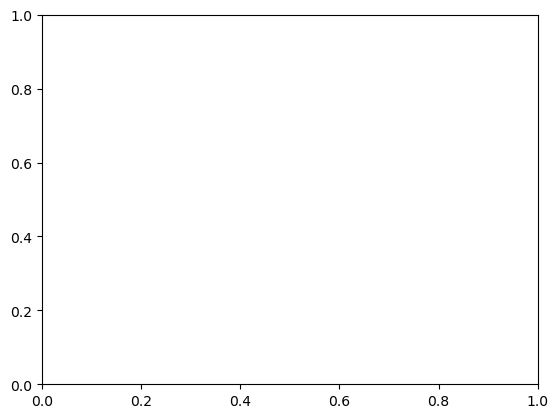

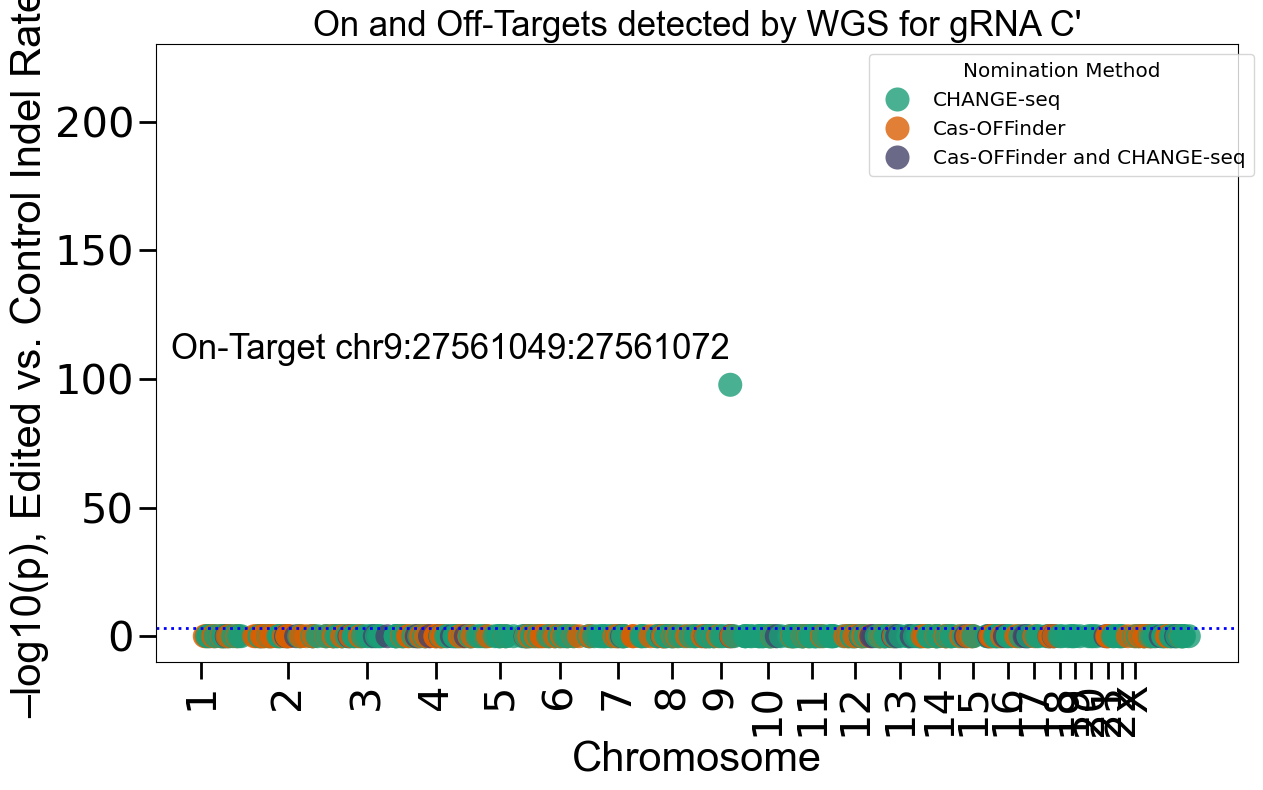

chr1
0 248801753 248801753
chr2
248801753 490804550 242002797
chr3
490804550 686760451 195955901
chr4
686760451 874133771 187373320
chr5
874133771 1054517156 180383385
chr6
1054517156 1224651109 170133953
chr7
1224651109 1383489089 158837980
chr8
1383489089 1528528777 145039688
chr9
1528528777 1666232738 137703961
chr10
1666232738 1799760522 133527784
chr11
1799760522 1933043981 133283459
chr12
1933043981 2065827407 132783426
chr13
2065827407 2179952757 114125350
chr14
2179952757 2286823581 106870824
chr15
2286823581 2388680980 101857399
chr16
2388680980 2478497548 89816568
chr17
2478497548 2561647216 83149668
chr18
2561647216 2641626799 79979583
chr19
2641626799 2699699631 58072832
chr20
2699699631 2763830557 64130926
chr21
2763830557 2810252997 46422440
chr22
2810252997 2860974045 50721048
chrX
2860974045 3016436750 155462705
{'chr1': 0, 'chr2': 248801753, 'chr3': 490804550, 'chr4': 686760451, 'chr5': 874133771, 'chr6': 1054517156, 'chr7': 1224651109, 'chr8': 1383489089, 'chr9': 1528

,chrom,category,start,end,p-value,%edited difference,offset_start
15,chr1,Cas-OFFinder and CHANGE-seq,994014,994037,1.0,-0.001815,994014
17,chr1,CHANGE-seq,1022367,1022390,1.0,0.000000,1022367
21,chr1,CHANGE-seq,1218324,1218347,1.0,0.000000,1218324
28,chr1,CHANGE-seq,1476918,1476940,1.0,0.000000,1476918
56,chr1,CHANGE-seq,2301518,2301541,1.0,-0.001692,2301518
...,...,...,...,...,...,...,...
3332,chrX,CHANGE-seq,154022261,154022283,1.0,0.002079,3014996306
3342,chrX,Cas-OFFinder,154882248,154882271,1.0,0.000000,3015856293
3344,chrX,Cas-OFFinder and CHANGE-seq,155306644,155306667,1.0,-0.002088,3016280689
3345,chrX,Cas-OFFinder,155377985,155378008,1.0,0.000000,3016352030


chrom                                        chr9
category              Cas-OFFinder and CHANGE-seq
start                                    27575445
end                                      27575468
p-value                                       0.0
%edited difference                       0.318059
offset_start                           1556104222
-log10 p-value                          85.770607
Name: 798, dtype: object

chrom                                       chr13
category              Cas-OFFinder and CHANGE-seq
start                                    45277306
end                                      45277329
p-value                                       0.0
%edited difference                       0.398287
offset_start                           2111104713
-log10 p-value                         157.022716
Name: 1290, dtype: object

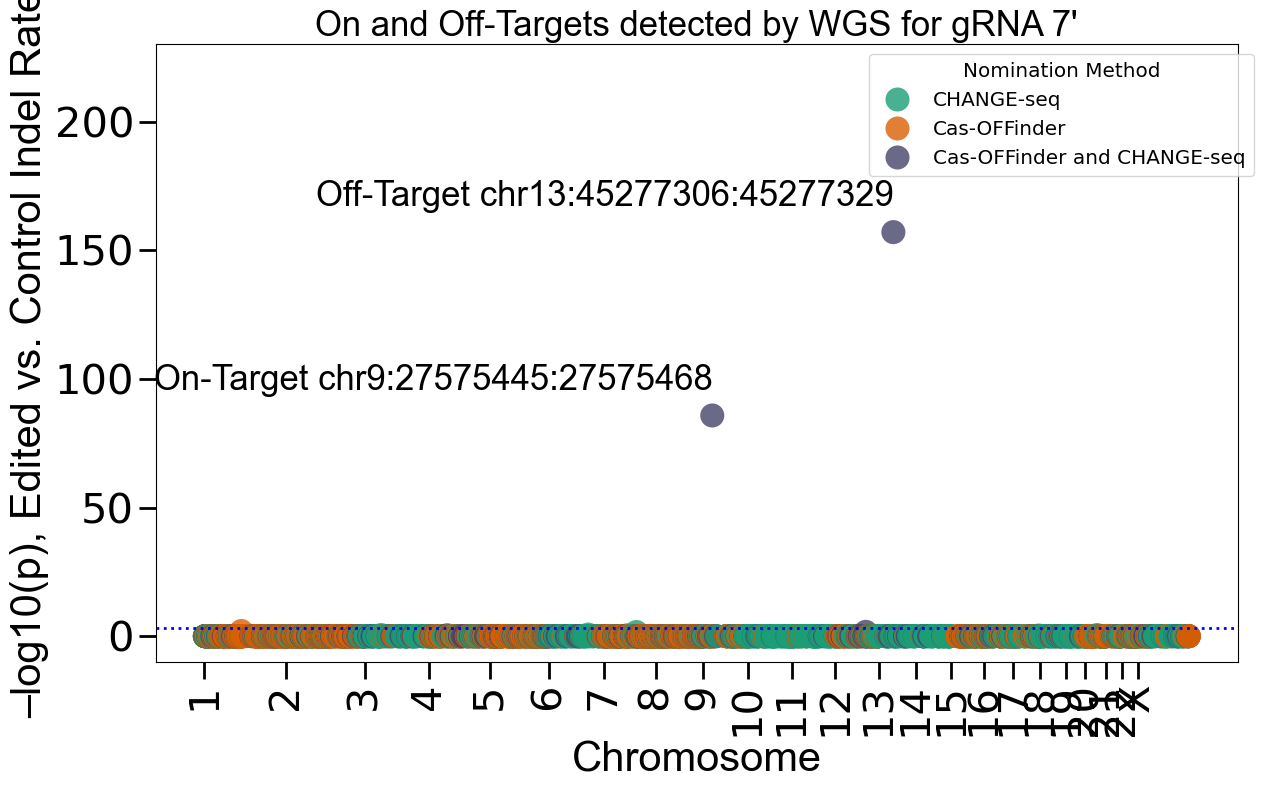

chr1
0 246693254 246693254
chr2
246693254 487174241 240480987
chr3
487174241 676171583 188997342
chr4
676171583 864895893 188724310
chr5
864895893 1044203121 179307228
chr6
1044203121 1174101007 129897886
chr7
1174101007 1332184068 158083061
chr8
1332184068 1471700519 139516451
chr9
1471700519 1609432565 137732046
chr10
1609432565 1740884214 131451649
chr11
1740884214 1858017051 117132837
chr12
1858017051 1981818922 123801871
chr13
1981818922 2092575176 110756254
chr14
2092575176 2160361102 67785926
chr15
2160361102 2252574488 92213386
chr16
2252574488 2333774742 81200254
chr17
2333774742 2415811276 82036534
chr18
2415811276 2494593107 78781831
chr19
2494593107 2552872804 58279697
chr20
2552872804 2615646011 62773207
chr21
2615646011 2661218086 45572075
chr22
2661218086 2710286023 49067937
chrX
2710286023 2837281472 126995449
{'chr1': 0, 'chr2': 246693254, 'chr3': 487174241, 'chr4': 676171583, 'chr5': 864895893, 'chr6': 1044203121, 'chr7': 1174101007, 'chr8': 1332184068, 'chr9': 147170

,chrom,category,start,end,p-value,%edited difference,offset_start
6,chr1,CHANGE-seq,2405292,2405315,1.0,0.000000,2405292
8,chr1,CHANGE-seq,3037317,3037340,1.0,0.000000,3037317
11,chr1,CHANGE-seq,3538825,3538848,1.0,0.000000,3538825
18,chr1,Cas-OFFinder,6477585,6477608,1.0,0.000000,6477585
24,chr1,CHANGE-seq,8527950,8527974,1.0,0.000000,8527950
...,...,...,...,...,...,...,...
166,chrX,Cas-OFFinder,89872818,89872841,1.0,0.000000,2800158841
179,chrX,CHANGE-seq,104296778,104296801,1.0,-0.001965,2814582801
185,chrX,Cas-OFFinder,111221006,111221029,1.0,0.000000,2821507029
186,chrX,CHANGE-seq,111460469,111460492,1.0,0.000000,2821746492


chrom                                        chr9
category              Cas-OFFinder and CHANGE-seq
start                                    27573645
end                                      27573668
p-value                                       0.0
%edited difference                       0.633523
offset_start                           1499274164
-log10 p-value                         197.148188
Name: 64, dtype: object

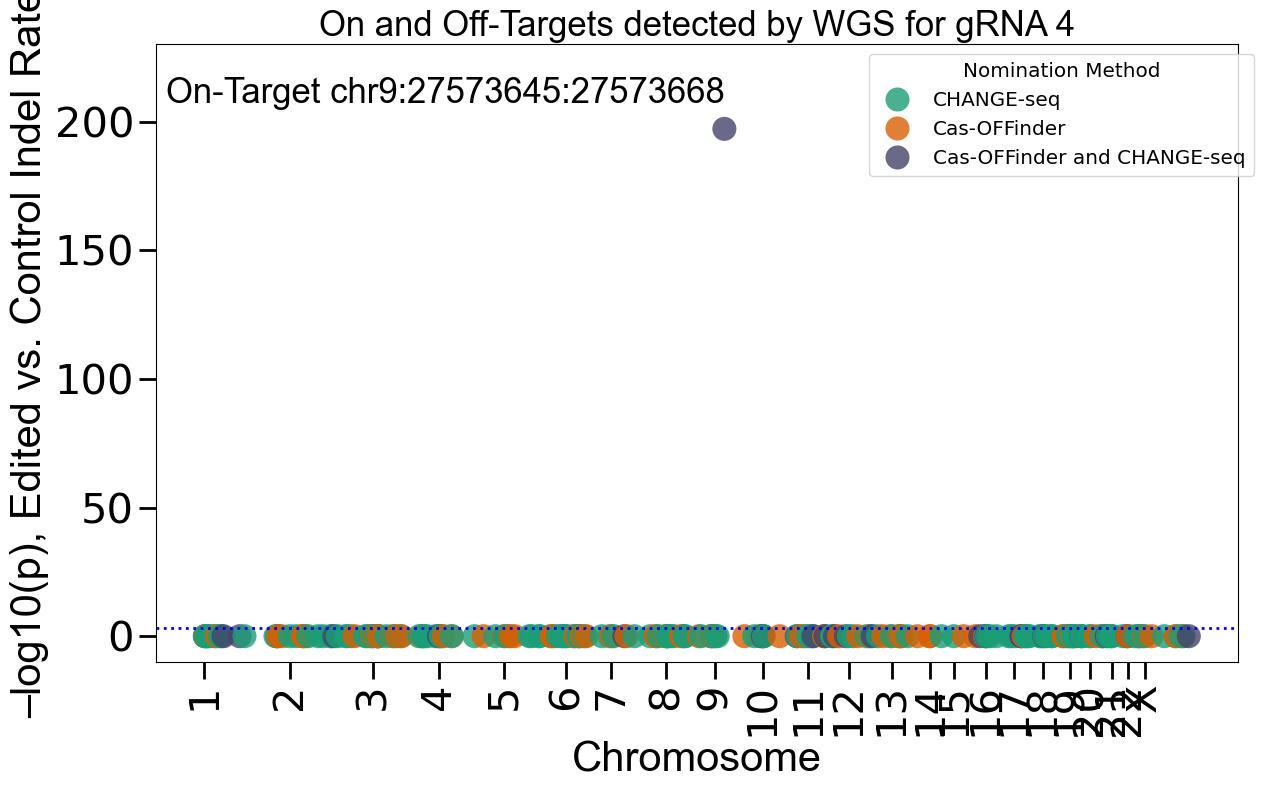

chr1
0 248906755 248906755
chr2
248906755 490465852 241559097
chr3
490465852 687406074 196940222
chr4
687406074 876695796 189289722
chr5
876695796 1057368927 180673131
chr6
1057368927 1227629761 170260834
chr7
1227629761 1386486080 158856319
chr8
1386486080 1531339223 144853143
chr9
1531339223 1669423273 138084050
chr10
1669423273 1802731864 133308591
chr11
1802731864 1937460899 134729035
chr12
1937460899 2070498569 133037670
chr13
2070498569 2184696698 114198129
chr14
2184696698 2290163322 105466624
chr15
2290163322 2389896640 99733318
chr16
2389896640 2479944414 90047774
chr17
2479944414 2562559592 82615178
chr18
2562559592 2642524174 79964582
chr19
2642524174 2700772229 58248055
chr20
2700772229 2764855965 64083736
chr21
2764855965 2811267731 46411766
chr22
2811267731 2861999056 50731325
chrX
2861999056 3016485788 154486732
{'chr1': 0, 'chr2': 248906755, 'chr3': 490465852, 'chr4': 687406074, 'chr5': 876695796, 'chr6': 1057368927, 'chr7': 1227629761, 'chr8': 1386486080, 'chr9': 15313

,chrom,category,start,end,p-value,%edited difference,offset_start
65,chr1,CHANGE-seq,1021277,1021300,1.000000,0.001558,1021277
68,chr1,CHANGE-seq,1045248,1045271,1.000000,0.001664,1045248
71,chr1,Cas-OFFinder and CHANGE-seq,1067711,1067734,1.000000,-0.002014,1067711
74,chr1,CHANGE-seq,1124435,1124458,1.000000,0.000000,1124435
78,chr1,CHANGE-seq,1185685,1185708,1.000000,-0.002721,1185685
...,...,...,...,...,...,...,...
2511,chrX,CHANGE-seq,152094438,152094461,0.867987,0.002551,3014093494
2515,chrX,Cas-OFFinder and CHANGE-seq,153470571,153470594,1.000000,-0.002387,3015469627
2517,chrX,CHANGE-seq,153737891,153737914,1.000000,0.000000,3015736947
2519,chrX,CHANGE-seq,154032102,154032125,1.000000,-0.003577,3016031158


chrom                                        chr9
category              Cas-OFFinder and CHANGE-seq
start                                    27573507
end                                      27573530
p-value                                       0.0
%edited difference                        0.52766
offset_start                           1558912730
-log10 p-value                         104.199886
Name: 731, dtype: object

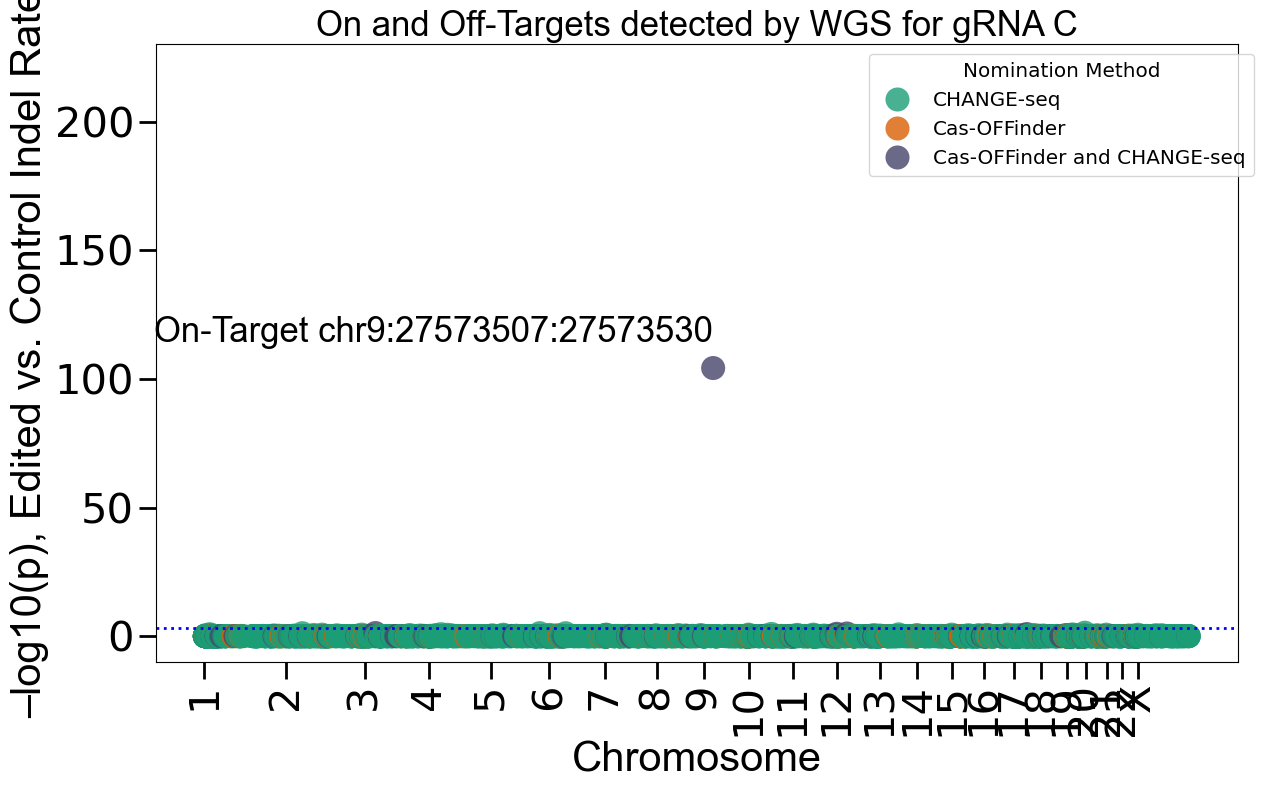

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define alternating black-gray colors
black_gray = ['#000000', '#808080']  # Black and Gray

# # Generate dictionary with alternating colors
# chromosomes = [f'chr{i}' for i in range(1, 23)]
# custom_palette = {chrom: black_gray[i % 2] for i, chrom in enumerate(chromosomes)}
# custom_palette['chrX'] = '#000000'
# custom_palette['chrY'] = '#808080'
# #color based off location


#color based of  what its located in
category = ['CHANGE-seq', 'Cas-OFFinder and CHANGE-seq', 'Cas-OFFinder']
handles, labels = plt.gca().get_legend_handles_labels()
label_to_handle = dict(zip(labels, handles))
ordered_labels = ['CHANGE-seq', 'Cas-OFFinder', 'Cas-OFFinder and CHANGE-seq']
desired_order = ['CHANGE-seq', 'Cas-OFFinder and CHANGE-seq', 'Cas-OFFinder']
ordered_handles = [label_to_handle[label] for label in ordered_labels if label in label_to_handle]

custom_palette = {'CHANGE-seq': '#1b9e77',  'Cas-OFFinder': '#d95f02', 'Cas-OFFinder and CHANGE-seq': '#46436b'}

# Print to verify
print(custom_palette)


#need to modify to include the chromosome X and the chromsome Y
#make the y axis the adjusted p-value instead

count=0
for condition in all_tsvs:
    for replicate in np.arange(0,1):
        # Create the data
        data = {
            'chrom': comp_dfs[condition][replicate]['chrom_orig'],
            'category': comp_dfs[condition][replicate]['category'],
            'start': comp_dfs[condition][replicate]['start_orig'],
            'end': comp_dfs[condition][replicate]['end_orig'],
            'p-value': comp_dfs[condition][replicate]['combined adjusted indel p-value']
        }
        
        df = pd.DataFrame(data)
        df['%edited difference'] = comp_dfs[condition][replicate]['edited indel %'] - comp_dfs[condition][replicate]['wt indel %']

        start_offset = []

        # Initialize the dictionary for offsets
        offsets = {}
        
        # Start by initializing the current position
        current_pos = 0
        
        # Iterate through each unique chromosome
        for chrom in df['chrom'].unique():
            print(chrom)
            
            # Get the data for the current chromosome
            chrom_data = df[df['chrom'] == chrom]
            
            # Find the maximum start position for the chromosome (end position)
            chrom_end = chrom_data['start'].max()  # Max position = end position for this chromosome
            print(current_pos, current_pos + chrom_end, chrom_end)
            # Store the offset (end position of the chromosome) in the dictionary
            offsets[chrom] = current_pos  # Offset is the cumulative position
            
            # Update the current position for the next chromosome
            current_pos += chrom_end  # Add the current chromosome's end position to the cumulative position
        
        # Print the offsets dictionary to see the results
        print(offsets)
        
        df['offset_start'] = df.apply(lambda row: row['start'] + offsets[row['chrom']], axis=1)
        display(df)

 
        # Transform p-values to -log10(p-value)
        df['-log10 p-value'] = -np.log10(df['p-value'])

        
        # Plot the Manhattan plot
        plt.figure(figsize=(13, 8))
        
        # Create scatter plot and remove edgecolor (no outline for dots)
        sns.scatterplot(data=df, x="offset_start", y="-log10 p-value", hue="category", palette=custom_palette, alpha=0.8, edgecolor='none', s = 300)
            
        # Label the plot
        plt.xlabel("Chromosome", fontsize=30,  fontfamily='Arial')
        plt.ylabel("–log10(p), Edited vs. Control Indel Rate", fontsize=30,  fontfamily='Arial')
        if condition == 'ALT7':
            title_name = "7'"
        if condition == 'ALTC':
            title_name = "C'"
        if condition == 'REXC':
            title_name = "C"
        if condition == 'REX4':
            title_name = '4'
        plt.title('On and Off-Targets detected by WGS for gRNA ' + title_name, fontsize=25,  fontfamily='Arial')
        
        # Customize the X-axis to display chromosomes properly (and adjust spacing if needed)
        chrom_boundaries = []
        chrom_labels = []
        
        # Track the cumulative position for each chromosome
        current_pos = 0
        for chrom in df['chrom'].unique():
            chrom_data = df[df['chrom'] == chrom]
            chrom_end = chrom_data['start'].max()  # Get the max position for the chromosome
            chrom_boundaries.append(current_pos)  # Add the offset
            chrom_labels.append(chrom)  # Add the chrom label
            current_pos += chrom_end  # Update current position

        significant_df = df[df['p-value'] < 0.001]

        # Label significant points
        for _, row in significant_df.iterrows():
            display(row)
            if row['chrom'] == 'chr9':
                plt.text(row['offset_start'] - 10, row['-log10 p-value'] + 10, 
                     f"On-Target {row['chrom']}:{int(row['start'])}:{int(row['end'])}", fontsize=25, ha='right', color='black',  fontfamily='Arial')
            else:
                 plt.text(row['offset_start'] - 10, row['-log10 p-value'] + 10, 
                     f"Off-Target {row['chrom']}:{int(row['start'])}:{int(row['end'])}", fontsize=25, ha='right', color='black',  fontfamily='Arial')

        # Set custom x-ticks based on chromosome boundaries
        plt.tick_params(axis='x', width=2)
        plt.tick_params(axis='y', width=2)
        plt.xticks(ticks=chrom_boundaries, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X'], rotation=90,fontsize=30)
        plt.tick_params(axis='x', length=12)
        plt.tick_params(axis='y', length=12)
        plt.yticks(fontsize=30)

        # Add a horizontal line to indicate the significance threshold (optional)
        # threshold = -np.log10(5e-8)
        # plt.axhline(y=threshold, color='red', linestyle='--', label="Significance Threshold")
        
        # Add a legend to indicate the chromosomes
        handles, labels = plt.gca().get_legend_handles_labels()
        label_to_handle = dict(zip(labels, handles))
        
        ordered_labels = ['CHANGE-seq', 'Cas-OFFinder', 'Cas-OFFinder and CHANGE-seq']
        ordered_handles = [label_to_handle[label] for label in ordered_labels if label in label_to_handle]
        
        legend = plt.legend(ordered_handles, ordered_labels, title="Nomination Method", bbox_to_anchor=(0.65, 1), loc='upper left', fontsize='x-large')
        legend.get_title().set_fontsize('x-large') 

        #plt.legend(title="Nomination Method", bbox_to_anchor=(0.75, 0.98), loc='upper left',  fontsize='large' )
        plt.ylim(-10,230)
            
        # Show the plot
        count += 1
        plt.axhline(y=3, color='blue', linestyle=':', linewidth=2)
        plt.tight_layout()
        # Increment the count
        
        # Save the plot with the count in the filename
        plt.savefig(f"Final_Plot{count}.svg", format='svg')  # <-- Use f-string to evaluate count

        plt.show()
